<center><h2>Random Forest™ Redux</h2></center>

By The End Of This Session You Should Be Able To:
----

- Summarize the important aspects of the Random Forest™ algorithm
- Explain what is Out-of-bag (OOB) error and how it can be used

Student Activity: Random Forest™ (RF) Summary
------

- RF is a Bagging (Bootstrap Aggregating) Technique
    - Bootstrap: \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
    - Aggregating: \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
- RF can fit a variety of data (numerical or categorical) with  \_\_\_\_\_ preprocessing
- RF is \_\_\_\_\_  bias and \_\_\_\_\_  variance with \_\_\_\_\_  tuning.

Random Forest™ (RF) Summary
------

- RF is a Bagging (Bootstrap Aggregating) Technique
    - Bootstrap: Create samples by sampling with replacement
    - Aggregating: Vote (classification) or average (Regression)


- RF can fit a variety of data (numerical or categorical) with no need for preprocessing


- RF is low bias and low variance with minimal tuning.

In [6]:
reset -fs

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

What is Out-Of-Bag (OOB) sample?
----

<center><img src="images/oob.jpg" width="35%"/></center>

For example, if the dataset is {1, 2, 3, 4, 5}

Bag 1 could be {2, 2, 4, 5, 2}. Then the OOB would {1, 3}

What is Out-Of-Bag  (OOB) error?
----

The mean prediction error on each training sample, using only the trees that did __not__ have the data in their bootstrap sample.

Can be used to measure the prediction error for any bagging method.

Why is Out-Of-Bag  (OOB) error useful?
----

Typically we do a three-way split (train, validation, and test). 

OOB gives use another method to assess our generalization error.



When should we use Out-Of-Bag  (OOB) instead of CV?
----

Comparing models within the same bagging procedure.

Very small datasets.

When should we NOT use Out-Of-Bag  (OOB) instead of CV?
----

Comparing across algorithms that are not bagged with the same procedure.

For example, use CV to compare Random Forest™ to k-NN.

OOB Example
-----

In [8]:
from sklearn.datasets import make_classification

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=123)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, random_state=123).fit(X, y)
rf.oob_score_ # Mean accuracy, an estimate of the generalization accuracy

0.85

In [10]:
# Use OOB to compare performance
ensemble_clfs = [
    ("RF, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=123)),
    ("RF, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=123)),
    ("RF, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=123))]

In [11]:
from collections import OrderedDict

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

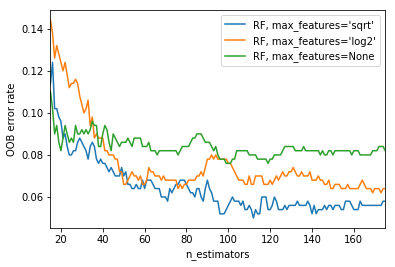

In [12]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items(): 
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

Summary
------

- Random Forest™ should be your primary model.
- Out-of-bag (OOB) error is prediction error on datapoints not appearing trees.
- OOB error is another method to asses model's ablitiy to generalize.